In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("USA_Housing.csv")

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [6]:
df.drop('Address', axis = 1, inplace = True)  # x are the set of columns and y is the column which we have to predict. Here all the other columns are x and Price column is Y. Since Price column does not depend on Address column we have dropped it.  

In [7]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [8]:
df.corr()   # Rule is all x columns should be correlated to Y but not to each each other.

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


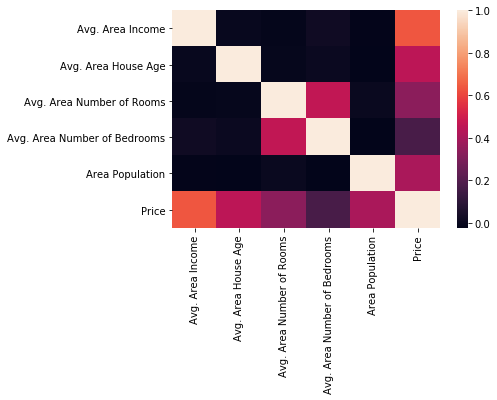

In [9]:
sns.heatmap(df.corr())  # it gives the correlation between all the columns. It will always give correlation in range of 1 to -1. Perfect correlation will have 1 value.

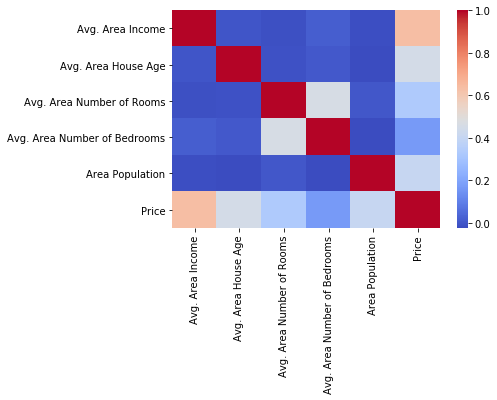

In [10]:
sns.heatmap(df.corr(), cmap = 'coolwarm')  # coolwarm gives the better color combination

In [11]:
# In the above plot we do see that Avg. Area Number of Bedrooms and Avg. Area Number of Rooms has 0.5 correlation. That means they are correlated. We will drop one of them. Since Avg. Area Number of Bedrooms has less correlation with Price column, we will drop it. Other x columns are having 0 correlation with each other so they are in dark blue color. 

df.drop('Avg. Area Number of Bedrooms', axis = 1, inplace =True)

In [12]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05


In [13]:
df.mean()  # gives mean of all columns

Avg. Area Income             6.858311e+04
Avg. Area House Age          5.977222e+00
Avg. Area Number of Rooms    6.987792e+00
Area Population              3.616352e+04
Price                        1.232073e+06
dtype: float64

In [14]:
# In the above dataframe Avg. Area Income column is having large number of values. So it will become a biased dataframe. We have to scale the dataframe so we are using below library and class

from sklearn.preprocessing import StandardScaler 

In [15]:
ss = StandardScaler()  # created object for scaler class

In [16]:
scaled_array = ss.fit_transform(df.drop('Price', axis =1))  # dropping Price column temporary

In [17]:
scaled_array.shape 

(5000, 4)

In [18]:
X = pd.DataFrame(data = scaled_array, columns = df.columns[:-1]) # in order to convert 

In [19]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,1.028660,-0.296927,0.021274,-1.317599
1,1.000808,0.025902,-0.255506,0.403999
2,-0.684629,-0.112303,1.516243,0.072410
3,-0.491499,1.221572,-1.393077,-0.186734
4,-0.807073,-0.944834,0.846742,-0.988387


In [20]:
y = df['Price']  

In [21]:
X.mean()

Avg. Area Income            -2.259304e-17
Avg. Area House Age         -8.176446e-18
Avg. Area Number of Rooms   -4.058254e-16
Area Population             -3.464784e-16
dtype: float64

In [22]:
# Our aim to predict values of y. So we will give some X and y column data to train. So we have to split the above dataframe horizontaly. We will give 70% data to train and remaining 30% we will use to predict value of y column.

In [23]:
from sklearn.model_selection import train_test_split  # library use to split the dataframe

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # splitted X and y into 70% and 30% i.e.0.3 

In [25]:
X_train.shape  

(3500, 4)

In [26]:
X_test.shape

(1500, 4)

In [27]:
y_train.shape

(3500,)

In [28]:
y_test.shape

(1500,)

In [ ]:
# Now will use the above values to train the model and predict the output values

In [29]:
from sklearn.linear_model import LinearRegression      # LinearRegression is the class of sklearn.linear_model function

In [30]:
lr = LinearRegression()  # created object of LinearRegression function

In [31]:
lr.fit(X_train, y_train)  #

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
lr.coef_    # y = m1x1+m2x2+m3x3+m4x4+C this is the linear equation. We have 4 columns so m and x value count should be 4. Here m values are the coefficient and C is the intercept. Once we calculate the values of m and C then for any value of x we can predict y.

array([231129.89109544, 162474.98043682, 122510.89145632, 149004.74835253])

In [33]:
lr.intercept_  # C value is the intercept

1232551.7496871306

In [35]:
ypred = lr.predict(X_test)  # We are giving X_test to model for training. Predict is the class used to predict value of ypred from X_test data.

In [36]:
len(ypred) # length of ypred and y_test will be same

1500

In [38]:
len(y_test)

1500

In [40]:
y_test-ypred  # difference between y_test and y_pred to see how much predicted values are close to actual values.

1354   -157293.754270
4177    103558.437678
2528   -190707.393054
3652    -64426.863539
4480    207467.037794
3206    -19602.470414
3708     42238.837797
3362    -48591.885355
2310   -160330.204611
2720    -43891.930135
649     -81067.473324
3718     61664.226164
3807   -126428.315527
3415     78976.458372
1657   -108312.471353
444     -17771.905885
2883     32568.236077
4090     48266.376769
1474     28666.581560
4775   -127259.313946
1125    -61325.377093
4823    -71722.161354
1053     59776.253712
3048    -34799.996475
2728      8084.332298
2230     55542.400139
119      64303.739015
2586     15271.796373
4213    105635.193626
731       1363.375815
            ...      
4698    101331.533736
1013    -36515.654846
4192     19962.898174
3530     96231.399450
1887    -46155.698763
926     -59491.732096
777     204639.848408
1379     -8983.765446
1060   -123181.940428
2210    120084.967891
320     -47713.735515
332      -3719.919188
689     -67743.834028
1610   -113794.558708
2742    14

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


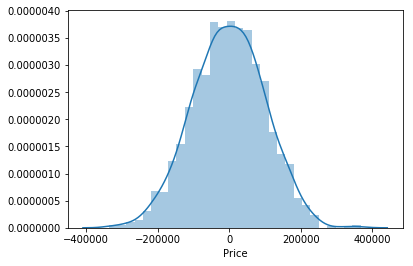

In [41]:
sns.distplot(y_test-ypred)

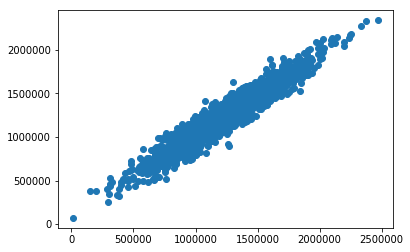

In [42]:
plt.scatter(y_test,ypred)